# Baseline Means and Significance Testing

## Conser's Baselines

#### Prose baseline

Conser 2020, p. 264: 
> In order to determine how accentual contours might align by chance,
it is first necessary to establish a baseline of chance alignment, using a con-
trol group. In the prose of Lysias’ *Against Eratosthenes*, for example, the rate of
matched accents between sections is **5.6%**, and the rate of compatible syllables
is **73.6%**, providing a minimum baseline for chance alignment.

Continuing in a footnote:

> Random ‘stanza pairs’ were created by pairing odd and even paragraphs of the first 12 sections and trimming the longer section to have the same number of syllables as the shorter.
This resulted in six stanza pairs, each containing an average of 86.5 syllables.

#### Trimeter baseline

Most important:

> Prose, however, is a poor choice of comparison for poetic texts, because of the effect of
metrical responsion. [...] It is not surprising, then, that the percentage of both matched accents and
compatible syllables are higher between sections of iambic trimeter, at **9.7%**
and **76.9%** respectively.

> Random stanza pairs were created by pairing sequential groups of eight lines, drawn from
Antigone 1-96 and 162-321 (Prologue and Episode 1). Resolutions were treated as a single
syllable. This resulted in sixteen stanza pairs, each containing 96 syllables.

**Summary:**

16 antistrophic pairs of 2x8 lines (strikingly, 8 is the mean for Aristophanes' cantica too!)

Accentual responsion: **9.7%**
Compatibility: **76.9%**

## My Baselines

### Appendix: Constructing the Lyric Tetrameter Baseline

Strophe line length should match the mean length of the stanzas in the corpus. Constructing 79 baseline cantica would be overdoing a bit, so 16 seems fine. 

Most importantly, I'm going to make two things beyond Conser:
- triadic and quadratic baselines, and
- lyric Frankenstain cantica, using metres that appear in multiple songs, most importantly 4 tr^, cr and ar.
  

In [1]:
from src.stats_comp import compatibility_corpus
from statistics import mean

all_sets = compatibility_corpus('data/compiled/')

flat = []
length = 0
cantica_lengths = []

for play in all_sets:
    for canticum in play:
        for line_group in canticum:
            flat.append(line_group)
            length += 1
    cantica_lengths.append(len(canticum))
mean_cantica_length = mean(cantica_lengths)

print(f'Total nr of sets of responding lines: {length} lines')
print(f'Mean strophe length: {mean_cantica_length} ≈ {round(mean_cantica_length)} lines')


Total nr of sets of responding lines: 518 lines
Mean strophe length: 6.181818181818182 ≈ 6 lines


Ach: 4x2x8. 
Excludes the extrametrical lines 43 and 61, and Pseudartabas weirdness, and also lines with anapests, e.g. 
    6,7 (36, 37 instead)

cantica = [
    [(1, 8), (9, 17)],
    [(18, 26), (27, 35)],
    [(72, 80), (81, 89)],
    [(108, 116), (117, 125)]
]

Eq. 4x2x8

cantica = [
    [(18, 26), (27, 35)],
    [(72, 80), (81, 89)],
    [(108, 116), (117, 125)],
    [(126, 134), (135, 143)]
]

Nu. 
Av.

Let's find trochaic tetrameter catalectics, and make a pseudo-canticum with them!

In [2]:
from lxml import etree
from pathlib import Path

compiled = [
    Path('scan') / file for file in [
        'responsion_ach_scan.xml', 
        'responsion_av_scan.xml', 
        'responsion_eq_scan.xml', 
        'responsion_nu_scan.xml', 
        'responsion_pax_scan.xml', 
        'responsion_v_scan.xml'
    ]
]

trochaic_tetrameter_catalectic = []

for xml_file in compiled:
    try:
        tree = etree.parse(xml_file)
        for l in tree.xpath("//l[@metre='4 tr^']"):
            text = ''.join(l.itertext()) # good lxml method to know; recursively joins all texts and tails
            title = tree.xpath("//title/text()")[0]
            provenience = title + l.attrib['n']
            if text == '' or l.attrib.get('skip', 'False') == 'True':
                continue
            complete_description = [provenience, text]
            trochaic_tetrameter_catalectic.append(complete_description)

    except etree.XMLSyntaxError as e:
        print(f"Error parsing XML: {e}")

print(trochaic_tetrameter_catalectic)
print(f'Lyric trochaic tetrameter catalectics found: {len(trochaic_tetrameter_catalectic)}')

with open('scan/lyricbaseline.txt', 'w', encoding='utf-8') as file:
    for line in trochaic_tetrameter_catalectic:
        file.write(f'<l n="{line[0]}">{line[1]}</l>\n')

OSError: Error reading file 'scan/responsion_ach_scan.xml': failed to load external entity "scan/responsion_ach_scan.xml"

### 6*3 Null Baselines

In [ ]:
from pathlib import Path

from src.stats import accentual_responsion_metric_canticum, accentual_responsion_metric_play
from src.stats_barys import barys_oxys_metric_canticum, barys_oxys_metric_play
from src.stats_comp import compatibility_corpus, compatibility_play, compatibility_canticum, compatibility_ratios_to_stats

trimeter_path = Path('data/compiled/baseline/responsion_baseline_compiled.xml')
trimeterpoly_path = Path('data/compiled/baseline/responsion_baselinepoly_compiled.xml')
tetrameter_path = Path('data/compiled/baseline/responsion_lyricbaseline_compiled.xml')

if not all(p.exists() for p in [tetrameter_path, trimeter_path, trimeterpoly_path]):
    print(f'Some baseline file paths do not exist.')

baseline_dict = {}

#
# Compatibility baselines (these are strictly means)
#

trimeter_2_strophic = compatibility_play(trimeter_path) # 3 antistrophic cantica of 2x8 lines each
trimeter_3_strophes = compatibility_canticum(trimeterpoly_path, 'baselinepoly01')
trimeter_4_strophes = compatibility_canticum(trimeterpoly_path, 'baselinepoly02')
tetrameter_2_strophes = compatibility_canticum(tetrameter_path, 'lyricbaseline01')
tetrameter_3_strophes = compatibility_canticum(tetrameter_path, 'lyricbaseline02')
tetrameter_4_strophes = compatibility_canticum(tetrameter_path, 'lyricbaseline03')

trimeter_2_strophic_baseline_comp = compatibility_ratios_to_stats([trimeter_2_strophic])
trimeter_3_strophes_baseline_comp = compatibility_ratios_to_stats([trimeter_3_strophes])
trimeter_4_strophes_baseline_comp = compatibility_ratios_to_stats([trimeter_4_strophes])
tetrameter_2_strophes_baseline_comp = compatibility_ratios_to_stats([tetrameter_2_strophes])
tetrameter_3_strophes_baseline_comp = compatibility_ratios_to_stats([tetrameter_3_strophes])
tetrameter_4_strophes_baseline_comp = compatibility_ratios_to_stats([tetrameter_4_strophes])

print('--------------------------------')
print('Contour compatibility baselines:')
print('--------------------------------')
print(f'Trimeter 2-strophes compatibility baseline: {trimeter_2_strophic_baseline_comp}')
print(f'Trimeter 3-strophes compatibility baseline: {trimeter_3_strophes_baseline_comp}')
print(f'Trimeter 4-strophes compatibility baseline: {trimeter_4_strophes_baseline_comp}')
print(f'Tetrameter 2-strophes compatibility baseline: {tetrameter_2_strophes_baseline_comp}')
print(f'Tetrameter 3-strophes compatibility baseline: {tetrameter_3_strophes_baseline_comp}')
print(f'Tetrameter 4-strophes compatibility baseline: {tetrameter_4_strophes_baseline_comp}')

print('--------------------------------')
all_sets = compatibility_corpus('data/compiled/') # takes a dir path 
total_comp = compatibility_ratios_to_stats(all_sets)
print(f'Total actual corpus compatibility: {total_comp}')
print('--------------------------------')

#
# Accentual responsion baselines (these are strictly ratios and not means)
#

trimeter_2_strophic_baseline_acc = accentual_responsion_metric_play(trimeter_path) # 3 antistrophic cantica of 2x8 lines each
trimeter_3_strophes_baseline_acc = accentual_responsion_metric_canticum(trimeterpoly_path, 'baselinepoly01')
trimeter_4_strophes_baseline_acc = accentual_responsion_metric_canticum(trimeterpoly_path, 'baselinepoly02')
tetrameter_2_strophes_baseline_acc = accentual_responsion_metric_canticum(tetrameter_path, 'lyricbaseline01')
tetrameter_3_strophes_baseline_acc = accentual_responsion_metric_canticum(tetrameter_path, 'lyricbaseline02')
tetrameter_4_strophes_baseline_acc = accentual_responsion_metric_canticum(tetrameter_path, 'lyricbaseline03')

print('\n--------------------------------')
print('Accentual responsion baselines:')
print('--------------------------------')
print(f'Trimeter 2-strophes accentual baseline: {trimeter_2_strophic_baseline_acc}')
for key, value in trimeter_2_strophic_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Trimeter 3-strophes accentual baseline: {trimeter_3_strophes_baseline_acc}')
for key, value in trimeter_3_strophes_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Trimeter 4-strophes accentual baseline: {trimeter_4_strophes_baseline_acc}')
for key, value in trimeter_4_strophes_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 2-strophes accentual baseline: {tetrameter_2_strophes_baseline_acc}')
for key, value in tetrameter_2_strophes_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 3-strophes accentual baseline: {tetrameter_3_strophes_baseline_acc}')
for key, value in tetrameter_3_strophes_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 4-strophes accentual baseline: {tetrameter_4_strophes_baseline_acc}')
for key, value in tetrameter_4_strophes_baseline_acc.items():
    print(f'  {key}: \033[32m{value}\033[0m')


#
# Barys responsion baselines (also ratios, not means)
#

trimeter_2_strophic_baseline_barys = barys_oxys_metric_play("baseline", baseline=True) # 3 antistrophic cantica of 2x8 lines each
trimeter_3_strophes_baseline_barys = barys_oxys_metric_canticum('baselinepoly01', baseline=True)
trimeter_4_strophes_baseline_barys = barys_oxys_metric_canticum('baselinepoly02', baseline=True)
tetrameter_2_strophes_baseline_barys = barys_oxys_metric_canticum('lyricbaseline01', baseline=True)
tetrameter_3_strophes_baseline_barys = barys_oxys_metric_canticum('lyricbaseline02', baseline=True)
tetrameter_4_strophes_baseline_barys = barys_oxys_metric_canticum('lyricbaseline03', baseline=True)

print('\n--------------------------------')
print('Barys responsion baselines:')
print('--------------------------------')

print(f'Trimeter 2-strophes barys baseline: {trimeter_2_strophic_baseline_barys}')
for key, value in trimeter_2_strophic_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Trimeter 3-strophes barys baseline: {trimeter_3_strophes_baseline_barys}')
for key, value in trimeter_3_strophes_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Trimeter 4-strophes barys baseline: {trimeter_4_strophes_baseline_barys}')
for key, value in trimeter_4_strophes_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 2-strophes barys baseline: {tetrameter_2_strophes_baseline_barys}')
for key, value in tetrameter_2_strophes_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 3-strophes barys baseline: {tetrameter_3_strophes_baseline_barys}')
for key, value in tetrameter_3_strophes_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')
print(f'Tetrameter 4-strophes barys baseline: {tetrameter_4_strophes_baseline_barys}')
for key, value in tetrameter_4_strophes_baseline_barys.items():
    print(f'  {key}: \033[32m{value}\033[0m')

--------------------------------
Contour compatibility baselines:
--------------------------------
Trimeter 2-strophes compatibility baseline: 0.7929447852760736
Trimeter 3-strophes compatibility baseline: 0.8103975535168195
Trimeter 4-strophes compatibility baseline: 0.7522935779816514
Tetrameter 2-strophes compatibility baseline: 0.8217391304347826
Tetrameter 3-strophes compatibility baseline: 0.8014814814814815
Tetrameter 4-strophes compatibility baseline: 0.7651515151515151
--------------------------------
Total actual corpus compatibility: 0.8205128205128205
--------------------------------

--------------------------------
Accentual responsion baselines:
--------------------------------
Trimeter 2-strophes accentual baseline: {'acute': 0.2251655629139073, 'grave': 0.034482758620689655, 'circumflex': 0.12307692307692308, 'acute_circumflex': 0.19444444444444445}
  acute: 0.2251655629139073
  grave: 0.034482758620689655
  circumflex: 0.12307692307692308
  acute_circumflex: 0.1944444

#### Making src/utils/baselines.py

In [6]:
baseline_dict = {
    'comp': {
        'trimeter_2_strophic': trimeter_2_strophic_baseline_comp,
        'trimeter_3_strophes': trimeter_3_strophes_baseline_comp,
        'trimeter_4_strophes': trimeter_4_strophes_baseline_comp,
        'tetrameter_2_strophes': tetrameter_2_strophes_baseline_comp,
        'tetrameter_3_strophes': tetrameter_3_strophes_baseline_comp,
        'tetrameter_4_strophes': tetrameter_4_strophes_baseline_comp
    },
    'acc': {
        'trimeter_2_strophic': trimeter_2_strophic_baseline_acc,
        'trimeter_3_strophes': trimeter_3_strophes_baseline_acc,
        'trimeter_4_strophes': trimeter_4_strophes_baseline_acc,
        'tetrameter_2_strophes': tetrameter_2_strophes_baseline_acc,
        'tetrameter_3_strophes': tetrameter_3_strophes_baseline_acc,
        'tetrameter_4_strophes': tetrameter_4_strophes_baseline_acc
    },
    'barys': {
        'trimeter_2_strophic': trimeter_2_strophic_baseline_barys,
        'trimeter_3_strophes': trimeter_3_strophes_baseline_barys,
        'trimeter_4_strophes': trimeter_4_strophes_baseline_barys,
        'tetrameter_2_strophes': tetrameter_2_strophes_baseline_barys,
        'tetrameter_3_strophes': tetrameter_3_strophes_baseline_barys,
        'tetrameter_4_strophes': tetrameter_4_strophes_baseline_barys
    }
}

for key, value in baseline_dict.items():
    print(f'\nBaseline {key} dict:')
    for subkey, subvalue in value.items():
        print(f'  {subkey}: {subvalue}')


# Pretty-print write the baseline dict to src/utils/baselines.py
import pprint

with open('src/utils/baselines.py', 'w', encoding='utf-8') as f:
    f.write('# This baseline dictionary is generated by a cell in the nb_significance.ipynb notebook.\n')
    f.write('baseline_dict = ')
    f.write(pprint.pformat(baseline_dict, width=100))
    f.write('\n')


Baseline comp dict:
  trimeter_2_strophic: 0.7929447852760736
  trimeter_3_strophes: 0.8103975535168195
  trimeter_4_strophes: 0.7522935779816514
  tetrameter_2_strophes: 0.8217391304347826
  tetrameter_3_strophes: 0.8014814814814815
  tetrameter_4_strophes: 0.7651515151515151

Baseline acc dict:
  trimeter_2_strophic: {'acute': 0.2251655629139073, 'grave': 0.034482758620689655, 'circumflex': 0.12307692307692308, 'acute_circumflex': 0.19444444444444445}
  trimeter_3_strophes: {'acute': 0.125, 'grave': 0.0, 'circumflex': 0.0, 'acute_circumflex': 0.08256880733944955}
  trimeter_4_strophes: {'acute': 0.03773584905660377, 'grave': 0.0, 'circumflex': 0.0, 'acute_circumflex': 0.026845637583892617}
  tetrameter_2_strophes: {'acute': 0.2893081761006289, 'grave': 0.10526315789473684, 'circumflex': 0.2318840579710145, 'acute_circumflex': 0.2719298245614035}
  tetrameter_3_strophes: {'acute': 0.11612903225806452, 'grave': 0.04054054054054054, 'circumflex': 0.04477611940298507, 'acute_circumflex'

#### Example usage of the baseline utility function

In [11]:
from src.utils.utils import baseline

# Example usage of the baseline utility function

print("\nGetting acute + circumflex responsion baseline for the tristrophic trimeter:")

# 1
print(baseline_dict["acc"]["trimeter_3_strophes"]["acute_circumflex"])

# 2
print(baseline("acc", "trimeter_3_strophes", "acute_circumflex"))



Getting acute + circumflex responsion baseline for the tristrophic trimeter:
0.08256880733944955
0.08256880733944955


## Null Hypothesis Testing

### Compatibility Mean

#### Chi-square test for the comp mean

##### Antistrophic distribution

In [ ]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info (Antistrophic)

all_sets = compatibility_strophicity('data/compiled/', 'antistrophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (observed, antistrophic): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(values)
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables (Antistrophic):')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean (observed, antistrophic): 0.8221052631578948
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 

Antistrophic trimeter null

In [22]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info (Antistrophic)

all_sets = compatibility_strophicity('data/compiled/baseline_trimeter', 'antistrophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (null, antistrophic trimeter): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean (null, antistrophic trimeter): 0.7929447852760736
Number of variables: 326
Distribution variables:
	0.5: 135
	1.0: 191


Antistrophic mean chi-square test against antistrophic trimeter null

In [27]:
import numpy as np
from scipy.stats import chisquare

# Observed counts
obs_counts = np.array([2197, 3978])  # [0.5, 1.0]
obs_total = obs_counts.sum()

# Null counts → proportions
null_counts = np.array([135, 191])
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under H₀
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
print(f"P-value: {p_value:.3e}")

Chi-square statistic: 86.5674
Degrees of freedom: 1
P-value: 1.351e-20


Making 200 antistrophic trimeter nulls...

In [137]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions_antistrophic = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 201):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_trimeter_shuffled{i}', 'antistrophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, antistrophic trimeter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions_antistrophic[i] = count_dict

print(shuffled_distributions_antistrophic)

# Make the dict in to a normal dict again
shuffled_distributions_three_strophic = {k: dict(v) for k, v in shuffled_distributions_antistrophic.items()}
print(shuffled_distributions_antistrophic)

1 shuffled versions
Compatibility mean (null, antistrophic trimeter): 0.7929447852760736
Number of variables: 326
Distribution variables:
	0.5: 135
	1.0: 191
---------------------------------
2 shuffled versions
Compatibility mean (null, antistrophic trimeter): 0.8055555555555556
Number of variables: 648
Distribution variables:
	0.5: 252
	1.0: 396
---------------------------------
3 shuffled versions
Compatibility mean (null, antistrophic trimeter): 0.8050411522633745
Number of variables: 972
Distribution variables:
	1.0: 593
	0.5: 379
---------------------------------
4 shuffled versions
Compatibility mean (null, antistrophic trimeter): 0.8036265432098766
Number of variables: 1296
Distribution variables:
	1.0: 787
	0.5: 509
---------------------------------
5 shuffled versions
Compatibility mean (null, antistrophic trimeter): 0.8024044389642416
Number of variables: 1622
Distribution variables:
	1.0: 981
	0.5: 641
---------------------------------
6 shuffled versions
Compatibility mean

Chi-square against 200 shuffled antistrophic trimeter nulls...

In [139]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_trimeters_antistrophic_p_values = defaultdict(dict)
for i in range(1, 201):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions_antistrophic[i]

    # Observed counts
    obs_counts = np.array([2197, 3978])  # [0.5, 1.0]
    obs_total = obs_counts.sum()

    # Null counts from antistrophic trimeter
    null_counts = np.array([distribution[0.5], distribution[1]])
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_trimeters_antistrophic_p_values[i] = p_value


shuffled_trimeters_antistrophic_p_values = {k: v for k, v in shuffled_trimeters_antistrophic_p_values.items()}
print("shuffled_trimeters_antistrophic_p_values = ")
for key, value in shuffled_trimeters_antistrophic_p_values.items():
    print(f'  {key}: {value:.9e}')

print(shuffled_trimeters_antistrophic_p_values)


Testing distribution 1:
Chi-square statistic: 86.5674
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-20)

Testing distribution 2:
Chi-square statistic: 28.4664
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-8)

Testing distribution 3:
Chi-square statistic: 30.2345
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-8)

Testing distribution 4:
Chi-square statistic: 35.3637
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-9)

Testing distribution 5:
Chi-square statistic: 40.1089
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-10)

Testing distribution 6:
Chi-square statistic: 48.6954
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-12)

Testing distribution 7:
Chi-square statistic: 49.3104
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-12)

Testing distribution 8:
Chi-square statistic: 45.2551
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-11)

Testing distribution 9:
Chi-square statistic: 48.3195
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-12)

Testing distribution 10:
Chi-square statistic: 54.3602
Degrees of 

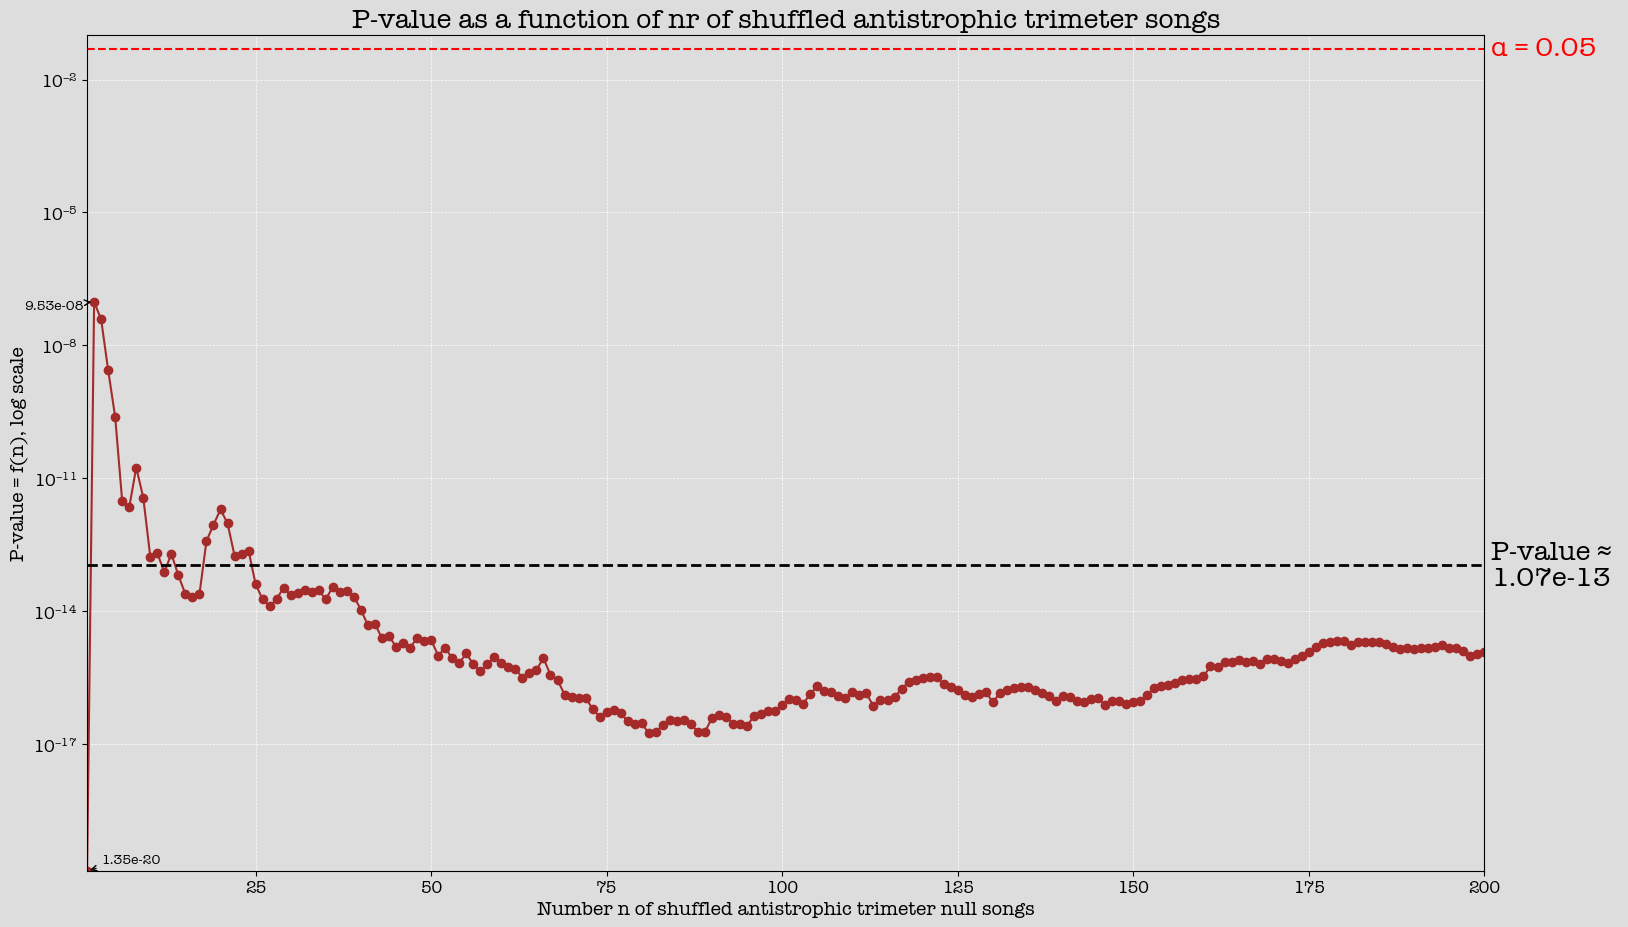

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_trimeters_antistrophic_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2e}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2e}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), 0.1)

# Labels and title
ax.set_xlabel("Number n of shuffled antistrophic trimeter null songs", color='black')
ax.set_ylabel("P-value = f(n), log scale", color='black')
ax.set_title("P-value as a function of nr of shuffled antistrophic trimeter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
           label=f'P-value = f(n) ≈ {weighted_asymptote:.2e} as n grows')

ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.2e}',
        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout()
plt.savefig("media/shuffled_trimeters_antistrophic_p_values.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

Antistrophic tetrameter null

In [29]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info (Antistrophic)

all_sets = compatibility_strophicity('data/compiled/baseline_tetrameter', 'antistrophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (null, antistrophic tetrameter): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean (null, antistrophic tetrameter): 0.8217391304347826
Number of variables: 345
Distribution variables:
	1.0: 222
	0.5: 123


Antistrophic tetrameter null SHUFFLED, 1 to 100 versions together

In [37]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info (Antistrophic)

all_sets = compatibility_strophicity('data/compiled/baseline_tetrameter_shuffled1', 'antistrophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (null, antistrophic tetrameter): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')
print('---------------------------------')

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 101):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_tetrameter_shuffled{i}', 'antistrophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, antistrophic tetrameter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions[i] = count_dict

print(shuffled_distributions)

# Make the dict in to a normal dict again
shuffled_distributions = {k: dict(v) for k, v in shuffled_distributions.items()}
print(shuffled_distributions)

Compatibility mean (null, antistrophic tetrameter): 0.8043478260869565
Number of variables: 345
Distribution variables:
	1.0: 210
	0.5: 135
---------------------------------
1 shuffled versions
Compatibility mean (null, antistrophic tetrameter): 0.8043478260869565
Number of variables: 345
Distribution variables:
	1.0: 210
	0.5: 135
---------------------------------
2 shuffled versions
Compatibility mean (null, antistrophic tetrameter): 0.8057971014492754
Number of variables: 690
Distribution variables:
	1.0: 422
	0.5: 268
---------------------------------
3 shuffled versions
Compatibility mean (null, antistrophic tetrameter): 0.8091787439613527
Number of variables: 1035
Distribution variables:
	1.0: 640
	0.5: 395
---------------------------------
4 shuffled versions
Compatibility mean (null, antistrophic tetrameter): 0.8152173913043478
Number of variables: 1380
Distribution variables:
	0.5: 510
	1.0: 870
---------------------------------
5 shuffled versions
Compatibility mean (null, an

Antistrophic mean chi-square test against antistrophic tetrameter null

In [31]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
obs_counts = np.array([2197, 3978])  # [0.5, 1.0]
obs_total = obs_counts.sum()

# Updated null counts from antistrophic tetrameter
null_counts = np.array([123, 222])  # [0.5, 1.0]
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under null
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.3f} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value is effectively zero (underflow)")

Chi-square statistic: 0.0144
Degrees of freedom: 1
P-value: 0.904 (≈ 10^-1)


Antistrophic mean chi-square test against SHUFFLED antistrophic tetrameter null

In [16]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
obs_counts = np.array([2197, 3978])  # [0.5, 1.0]
obs_total = obs_counts.sum()

# Updated null counts from antistrophic tetrameter
null_counts = np.array([754, 1316])  # [0.5, 1.0]
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under null
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.3f} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value is effectively zero (underflow)")

Chi-square statistic: 1.9093
Degrees of freedom: 1
P-value: 0.167 (≈ 10^-1)


Chi-square test using all ever-growing concatenations of 100 shuffled distributions

In [121]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_tetrameters_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions[i]

    # Observed counts
    obs_counts = np.array([2197, 3978])  # [0.5, 1.0]
    obs_total = obs_counts.sum()

    # Updated null counts from antistrophic tetrameter
    null_counts = np.array([distribution[0.5], distribution[1]])  # [0.5, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_tetrameters_p_values[i] = p_value


shuffled_tetrameters_p_values = {k: v for k, v in shuffled_tetrameters_p_values.items() if v < 0.05}
print("shuffled_tetrameters_p_values = ")
for key, value in shuffled_tetrameters_p_values.items():
    print(f'  {key}: {value:.9f}')


Testing distribution 1:
Chi-square statistic: 32.6996
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-8)

Testing distribution 2:
Chi-square statistic: 27.6540
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-7)

Testing distribution 3:
Chi-square statistic: 17.4890
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-5)

Testing distribution 4:
Chi-square statistic: 5.0296
Degrees of freedom: 1
P-value: 0.0249 (≈ 10^-2)

Testing distribution 5:
Chi-square statistic: 5.6791
Degrees of freedom: 1
P-value: 0.0172 (≈ 10^-2)

Testing distribution 6:
Chi-square statistic: 1.9093
Degrees of freedom: 1
P-value: 0.1670 (≈ 10^-1)

Testing distribution 7:
Chi-square statistic: 5.8072
Degrees of freedom: 1
P-value: 0.0160 (≈ 10^-2)

Testing distribution 8:
Chi-square statistic: 6.7261
Degrees of freedom: 1
P-value: 0.0095 (≈ 10^-3)

Testing distribution 9:
Chi-square statistic: 8.0647
Degrees of freedom: 1
P-value: 0.0045 (≈ 10^-3)

Testing distribution 10:
Chi-square statistic: 7.0944
Degrees of freedom: 1
P-

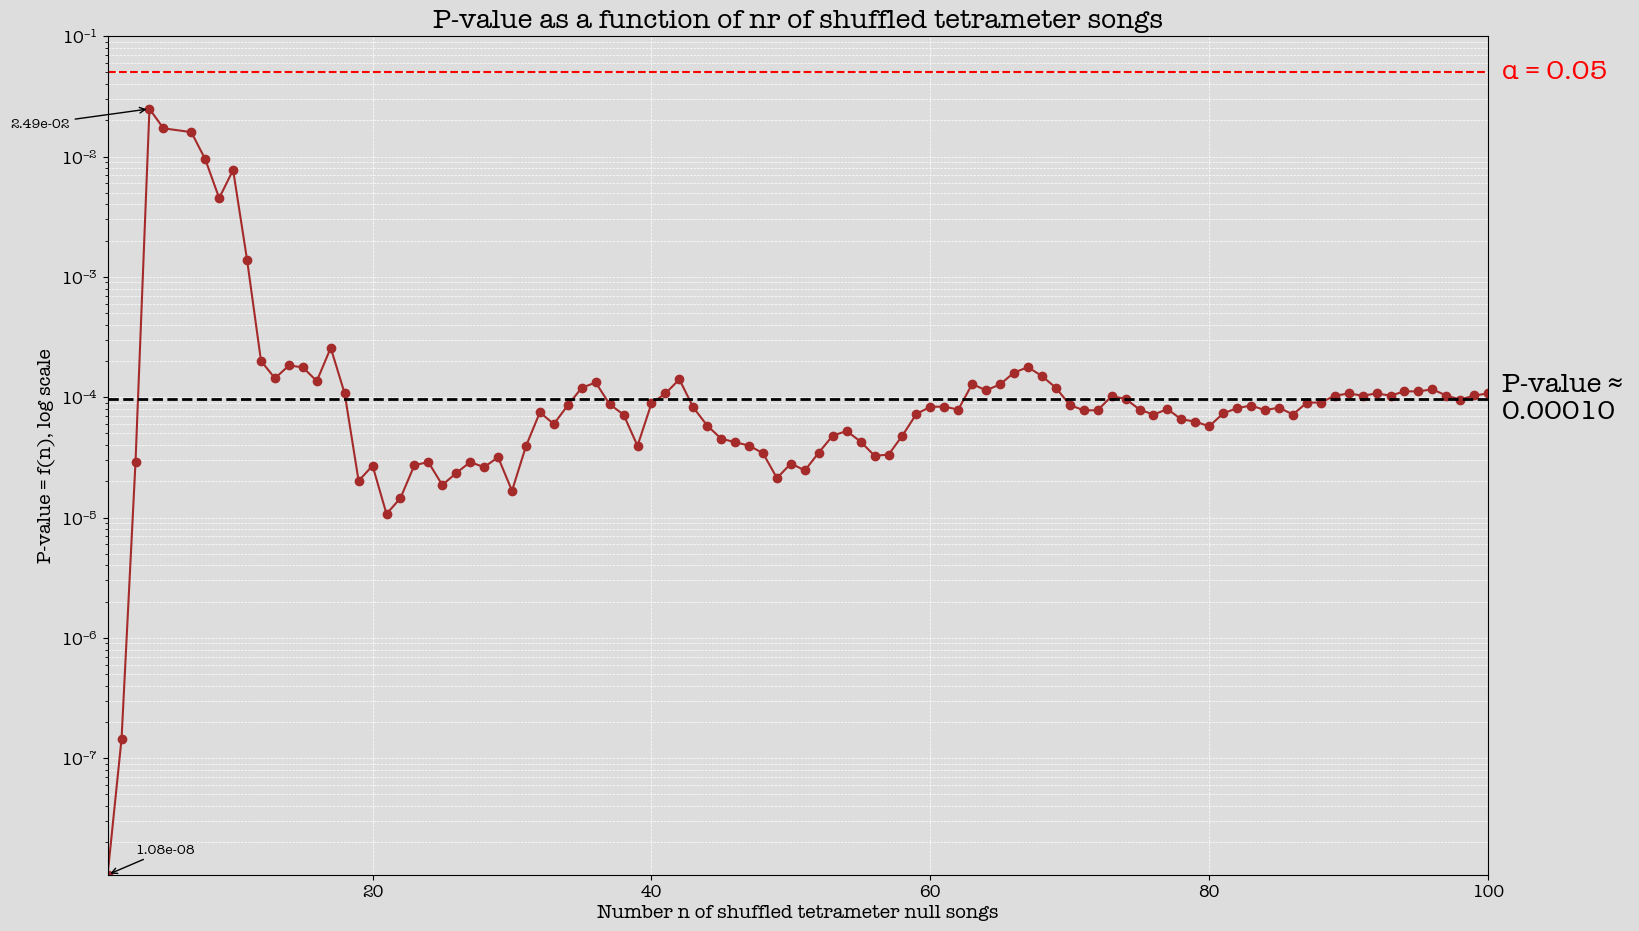

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_tetrameters_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2e}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2e}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), 0.1)

# Labels and title
ax.set_xlabel("Number n of shuffled tetrameter null songs", color='black')
ax.set_ylabel("P-value = f(n), log scale", color='black')
ax.set_title("P-value as a function of nr of shuffled tetrameter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
           label=f'P-value = f(n) ≈ {weighted_asymptote:.2e} as n grows')

ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.5f}',
        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout(pad=1.0)
plt.savefig("p-value_as_function_of_shuffled_tetrameters.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

Let's estimate Conser's distribution to do a test on Aeschylus against my tetrameter null. If we assume Conser's distribution is binary and the sample size is about the same as Aristophanes' at ≈ 6000, we get the distribution by:

μ = (nr of 1s)/6000 = 0.802 
=>  nr of 1s = 4812
    nr of 0s = 6000 - 4812 = 1188

In [95]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_tetrameters_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions[i]

    # Observed counts
    obs_counts = np.array([1188, 4812])  # [0, 1.0]
    obs_total = obs_counts.sum()

    # Updated null counts from antistrophic tetrameter
    null_counts = np.array([distribution[0.5], distribution[1]])  # [0.5, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_tetrameters_p_values[i] = p_value


shuffled_tetrameters_p_values = {k: v for k, v in shuffled_tetrameters_p_values.items() if v < 0.05}
print("shuffled_tetrameters_p_values = ")
for key, value in shuffled_tetrameters_p_values.items():
    print(f'  {key}: {value:.9f}')


Testing distribution 1:
Chi-square statistic: 941.2817
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-206)

Testing distribution 2:
Chi-square statistic: 915.7196
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-201)

Testing distribution 3:
Chi-square statistic: 857.4352
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-188)

Testing distribution 4:
Chi-square statistic: 758.0162
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-167)

Testing distribution 5:
Chi-square statistic: 764.9772
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-168)

Testing distribution 6:
Chi-square statistic: 716.1341
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-158)

Testing distribution 7:
Chi-square statistic: 766.3066
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-168)

Testing distribution 8:
Chi-square statistic: 775.4758
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-170)

Testing distribution 9:
Chi-square statistic: 787.8763
Degrees of freedom: 1
P-value: 0.0000 (≈ 10^-173)

Testing distribution 10:
Chi-square statistic

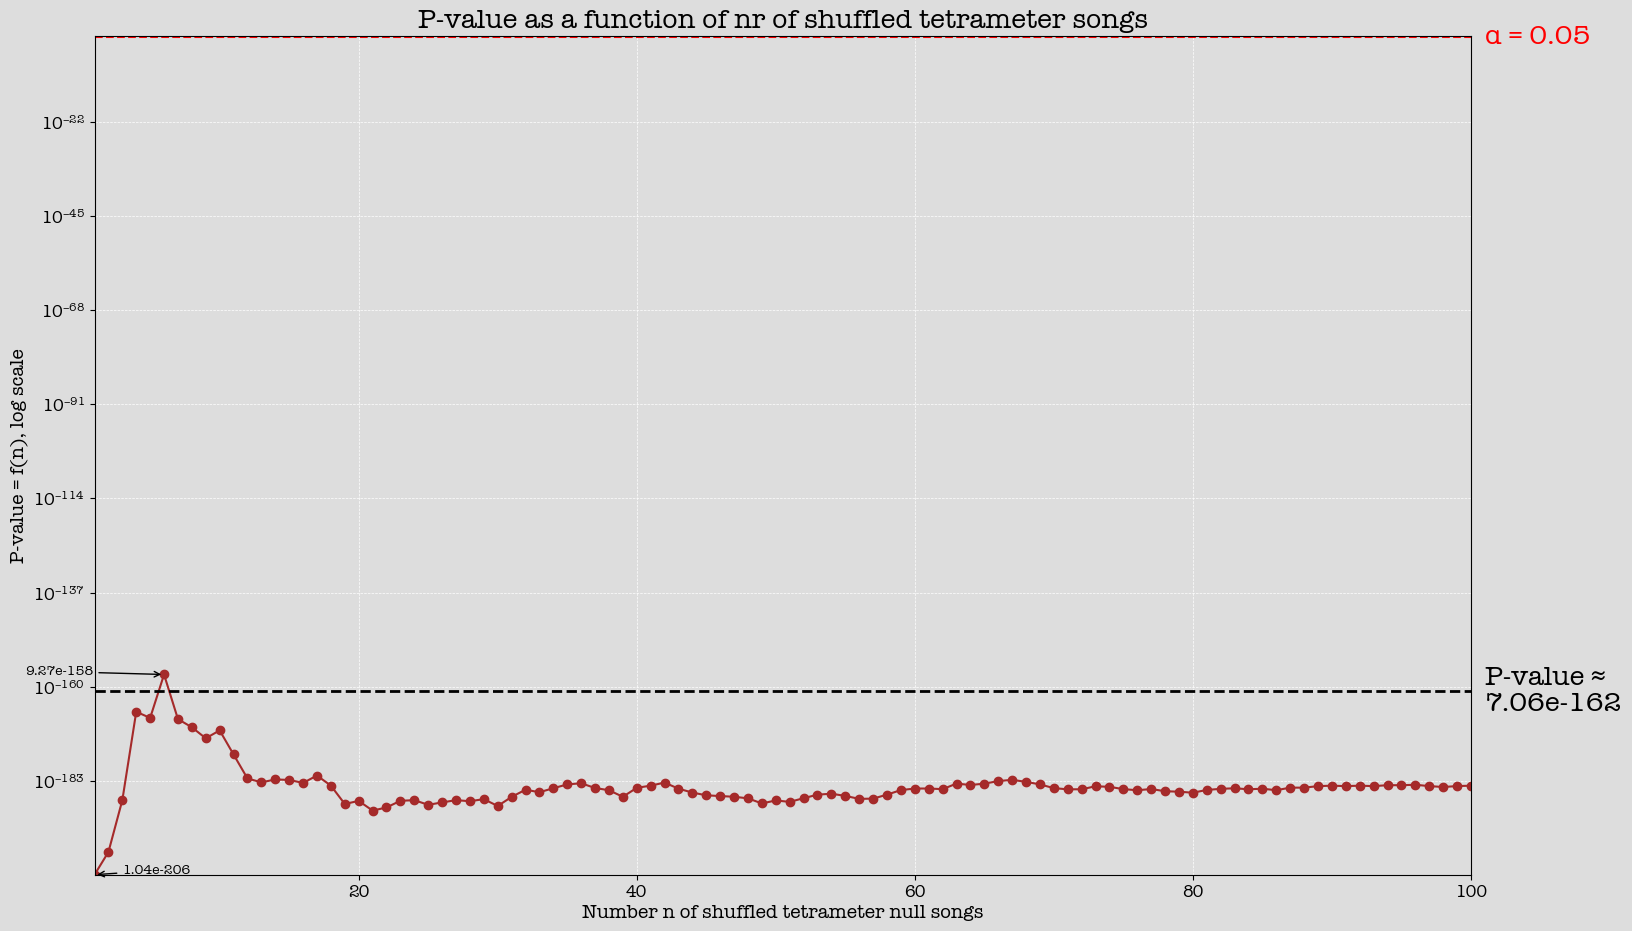

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_tetrameters_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2e}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2e}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), 0.1)

# Labels and title
ax.set_xlabel("Number n of shuffled tetrameter null songs", color='black')
ax.set_ylabel("P-value = f(n), log scale", color='black')
ax.set_title("P-value as a function of nr of shuffled tetrameter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
           label=f'P-value = f(n) ≈ {weighted_asymptote:.2e} as n grows')

ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.2e}',
        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout(pad=1.0)
plt.savefig("p-value_as_function_of_shuffled_tetrameters.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

##### 3 and 4-strophic distributions

1. Polystrophic observed distribution
2. Polystrophic trimeter null
3. Chi-square test against trimeter null
4. Polystrophic tetrameter null
5. Chi-square test against tetrameter null

3-strophic observed distribution

In [7]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/', 'three-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (observed): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables (Polystrophic):')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean (observed): 0.8172043010752688
Number of variables: 155
Distribution variables (Polystrophic):
	0.6666666666666666: 85
	1.0: 70


3-strophic null trimeter

In [5]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/baseline_trimeter', 'three-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean: {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean: 0.8103975535168195
Number of variables: 109
Distribution variables:
	0.6666666666666666: 62
	1.0: 47


Chi-square test comparing observed 3-strophic distribution to 3-strophic trimeter null:

In [ ]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
# Order: [0.666..., 1.0]
obs_counts = np.array([85, 70])
obs_total = obs_counts.sum()

# Null counts (for expected proportions)
null_counts = np.array([62, 47])
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under H₀ (scaled to obs_total)
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print("Chi-square test comparing observed 3-strophic distribution to 3-strophic trimeter null:")
print(f"Observed total: {obs_total}")
print(f"Expected counts under H₀: {expected_counts.round(2)}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value: < 1e-{0}".format(abs(int(np.floor(np.log10(np.finfo(float).eps))))))

Chi-square test comparing observed polystrophic distribution to trimeter null:
Observed total: 155
Expected counts under H₀: [88.17 66.83]
Chi-square statistic: 0.2635
Degrees of freedom: 1
P-value: 0.6077 (≈ 10^-1)


Making 100 TRIMETER 3-strophic nulls...

In [143]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions_threestrophic_trimeter = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 101):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_trimeter_shuffled{i}', 'three-strophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, three-strophic trimeter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions_threestrophic_trimeter[i] = count_dict

print(shuffled_distributions_threestrophic_trimeter)

# Make the dict in to a normal dict again
shuffled_distributions_threestrophic_trimeter = {k: dict(v) for k, v in shuffled_distributions_threestrophic_trimeter.items()}
print(shuffled_distributions_threestrophic_trimeter)

1 shuffled versions
Compatibility mean (null, three-strophic trimeter): 0.8103975535168195
Number of variables: 109
Distribution variables:
	0.6666666666666666: 62
	1.0: 47
---------------------------------
2 shuffled versions
Compatibility mean (null, three-strophic trimeter): 0.7956989247311828
Number of variables: 217
Distribution variables:
	0.6666666666666666: 133
	1.0: 84
---------------------------------
3 shuffled versions
Compatibility mean (null, three-strophic trimeter): 0.8006134969325153
Number of variables: 326
Distribution variables:
	1.0: 131
	0.6666666666666666: 195
---------------------------------
4 shuffled versions
Compatibility mean (null, three-strophic trimeter): 0.7996941896024464
Number of variables: 436
Distribution variables:
	0.6666666666666666: 262
	1.0: 174
---------------------------------
5 shuffled versions
Compatibility mean (null, three-strophic trimeter): 0.7963302752293577
Number of variables: 545
Distribution variables:
	0.6666666666666666: 333
	1

In [145]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_tetrameters_three_strophic_trimeter_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions_threestrophic_trimeter[i]

    # Observed counts
    obs_counts = np.array([85, 70])  # [0.66, 1.0]
    obs_total = obs_counts.sum()

    # Updated null counts from antistrophic tetrameter
    null_counts = np.array([distribution[0.6666666666666666], distribution[1]])  # [0.66, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_tetrameters_three_strophic_trimeter_p_values[i] = p_value


shuffled_tetrameters_three_strophic_trimeter_p_values = {k: v for k, v in shuffled_tetrameters_three_strophic_trimeter_p_values.items()}
print("shuffled_tetrameters_three_strophic_trimeter_p_values = ")
for key, value in shuffled_tetrameters_three_strophic_trimeter_p_values.items():
    print(f'  {key}: {value:.9f}')

print(shuffled_tetrameters_three_strophic_trimeter_p_values)


Testing distribution 1:
Chi-square statistic: 0.2635
Degrees of freedom: 1
P-value: 0.6077 (≈ 10^-1)

Testing distribution 2:
Chi-square statistic: 2.7193
Degrees of freedom: 1
P-value: 0.0991 (≈ 10^-2)

Testing distribution 3:
Chi-square statistic: 1.5975
Degrees of freedom: 1
P-value: 0.2063 (≈ 10^-1)

Testing distribution 4:
Chi-square statistic: 1.7835
Degrees of freedom: 1
P-value: 0.1817 (≈ 10^-1)

Testing distribution 5:
Chi-square statistic: 2.5574
Degrees of freedom: 1
P-value: 0.1098 (≈ 10^-1)

Testing distribution 6:
Chi-square statistic: 3.1569
Degrees of freedom: 1
P-value: 0.0756 (≈ 10^-2)

Testing distribution 7:
Chi-square statistic: 3.7108
Degrees of freedom: 1
P-value: 0.0541 (≈ 10^-2)

Testing distribution 8:
Chi-square statistic: 3.9121
Degrees of freedom: 1
P-value: 0.0479 (≈ 10^-2)

Testing distribution 9:
Chi-square statistic: 3.6432
Degrees of freedom: 1
P-value: 0.0563 (≈ 10^-2)

Testing distribution 10:
Chi-square statistic: 3.9060
Degrees of freedom: 1
P-val

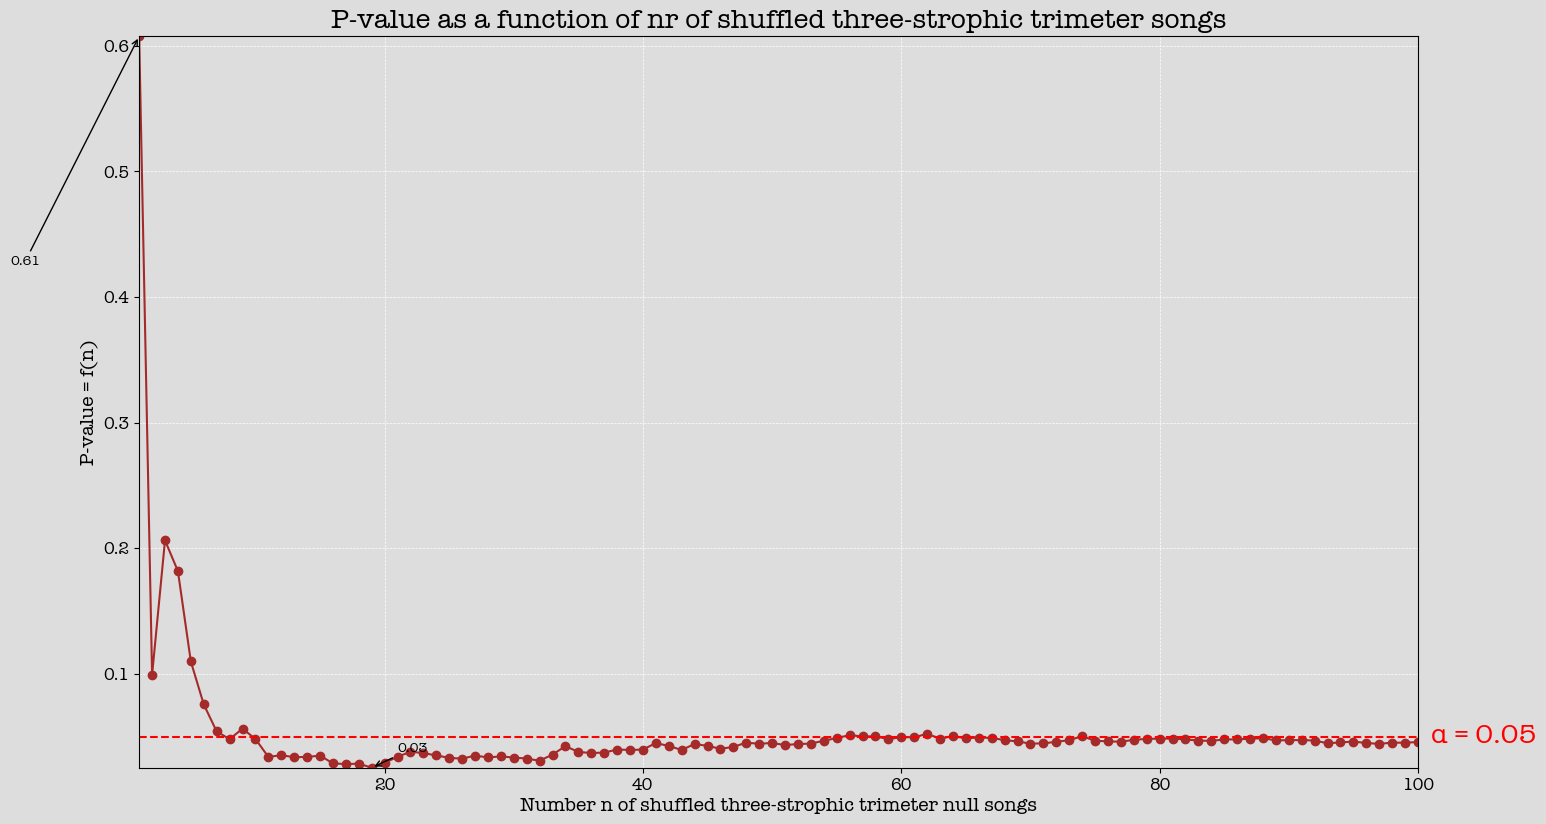

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_tetrameters_three_strophic_trimeter_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2f}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2f}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
#ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Labels and title
ax.set_xlabel("Number n of shuffled three-strophic trimeter null songs", color='black')
ax.set_ylabel("P-value = f(n)", color='black')
ax.set_title("P-value as a function of nr of shuffled three-strophic trimeter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
#weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
#ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
#           label=f'P-value = f(n) ≈ {weighted_asymptote:.2f} as n grows')

#ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.2f}',
#        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout
plt.savefig("p-value_as_function_of_shuffled_threestrophic_trimeters.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

3-strophic tetrameter null

In [9]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/baseline_tetrameter', 'three-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean: {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean: 0.8014814814814815
Number of variables: 225
Distribution variables:
	0.6666666666666666: 134
	1.0: 91


Chi-square test comparing observed 3-strophic distribution to 3-strophic TETRAMETER null:

In [10]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
# Order: [0.666..., 1.0]
obs_counts = np.array([85, 70])
obs_total = obs_counts.sum()

# Null counts (for expected proportions)
null_counts = np.array([134, 91])
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under H₀ (scaled to obs_total)
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print("Chi-square test comparing observed 3-strophic distribution to 3-strophic TETRAMETER null:")
print(f"Observed total: {obs_total}")
print(f"Expected counts under H₀: {expected_counts.round(2)}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value: < 1e-{0}".format(abs(int(np.floor(np.log10(np.finfo(float).eps))))))

Chi-square test comparing observed 3-strophic distribution to 3-strophic TETRAMETER null:
Observed total: 155
Expected counts under H₀: [92.31 62.69]
Chi-square statistic: 1.4317
Degrees of freedom: 1
P-value: 0.2315 (≈ 10^-1)


Making 100 shuffled null 3-strophic distributions

In [ ]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions_three_strophic = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 101):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_tetrameterall_shuffled{i}', 'three-strophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, 3-strophic tetrameter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions_three_strophic[i] = count_dict

print(shuffled_distributions_three_strophic)

# Make the dict in to a normal dict again
shuffled_distributions_three_strophic = {k: dict(v) for k, v in shuffled_distributions_three_strophic.items()}
print(shuffled_distributions_three_strophic)

1 shuffled versions
Compatibility mean (null, 3-strophic tetrameter): 0.8014814814814815
Number of variables: 225
Distribution variables:
	0.6666666666666666: 134
	1.0: 91
---------------------------------
2 shuffled versions
Compatibility mean (null, 3-strophic tetrameter): 0.8096296296296296
Number of variables: 450
Distribution variables:
	0.6666666666666666: 257
	1.0: 193
---------------------------------
3 shuffled versions
Compatibility mean (null, 3-strophic tetrameter): 0.8098765432098766
Number of variables: 675
Distribution variables:
	0.6666666666666666: 385
	1.0: 290
---------------------------------
4 shuffled versions
Compatibility mean (null, 3-strophic tetrameter): 0.8129629629629629
Number of variables: 900
Distribution variables:
	0.6666666666666666: 505
	1.0: 395
---------------------------------
5 shuffled versions
Compatibility mean (null, 3-strophic tetrameter): 0.8106666666666666
Number of variables: 1125
Distribution variables:
	0.6666666666666666: 639
	1.0: 486

Chi-square test comparing observed 3-strophic distribution to 100 SHUFFLED 3-strophic tetrameter null:

In [ ]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_tetrameters_three_strophic_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions_three_strophic[i]

    # Observed counts
    obs_counts = np.array([85, 70])  # [0.66, 1.0]
    obs_total = obs_counts.sum()

    # Updated null counts from antistrophic tetrameter
    null_counts = np.array([distribution[0.6666666666666666], distribution[1]])  # [0.66, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_tetrameters_three_strophic_p_values[i] = p_value


shuffled_tetrameters_three_strophic_p_values = {k: v for k, v in shuffled_tetrameters_three_strophic_p_values.items()}
print("shuffled_tetrameters_three_strophic_p_values = ")
for key, value in shuffled_tetrameters_three_strophic_p_values.items():
    print(f'  {key}: {value:.9f}')

print(shuffled_tetrameters_three_strophic_p_values)


Testing distribution 1:
Chi-square statistic: 1.4317
Degrees of freedom: 1
P-value: 0.2315 (≈ 10^-1)

Testing distribution 2:
Chi-square statistic: 0.3268
Degrees of freedom: 1
P-value: 0.5676 (≈ 10^-1)

Testing distribution 3:
Chi-square statistic: 0.3057
Degrees of freedom: 1
P-value: 0.5803 (≈ 10^-1)

Testing distribution 4:
Chi-square statistic: 0.1019
Degrees of freedom: 1
P-value: 0.7496 (≈ 10^-1)

Testing distribution 5:
Chi-square statistic: 0.2430
Degrees of freedom: 1
P-value: 0.6221 (≈ 10^-1)

Testing distribution 6:
Chi-square statistic: 0.1780
Degrees of freedom: 1
P-value: 0.6731 (≈ 10^-1)

Testing distribution 7:
Chi-square statistic: 0.2036
Degrees of freedom: 1
P-value: 0.6518 (≈ 10^-1)

Testing distribution 8:
Chi-square statistic: 0.1305
Degrees of freedom: 1
P-value: 0.7180 (≈ 10^-1)

Testing distribution 9:
Chi-square statistic: 0.1431
Degrees of freedom: 1
P-value: 0.7052 (≈ 10^-1)

Testing distribution 10:
Chi-square statistic: 0.1537
Degrees of freedom: 1
P-val

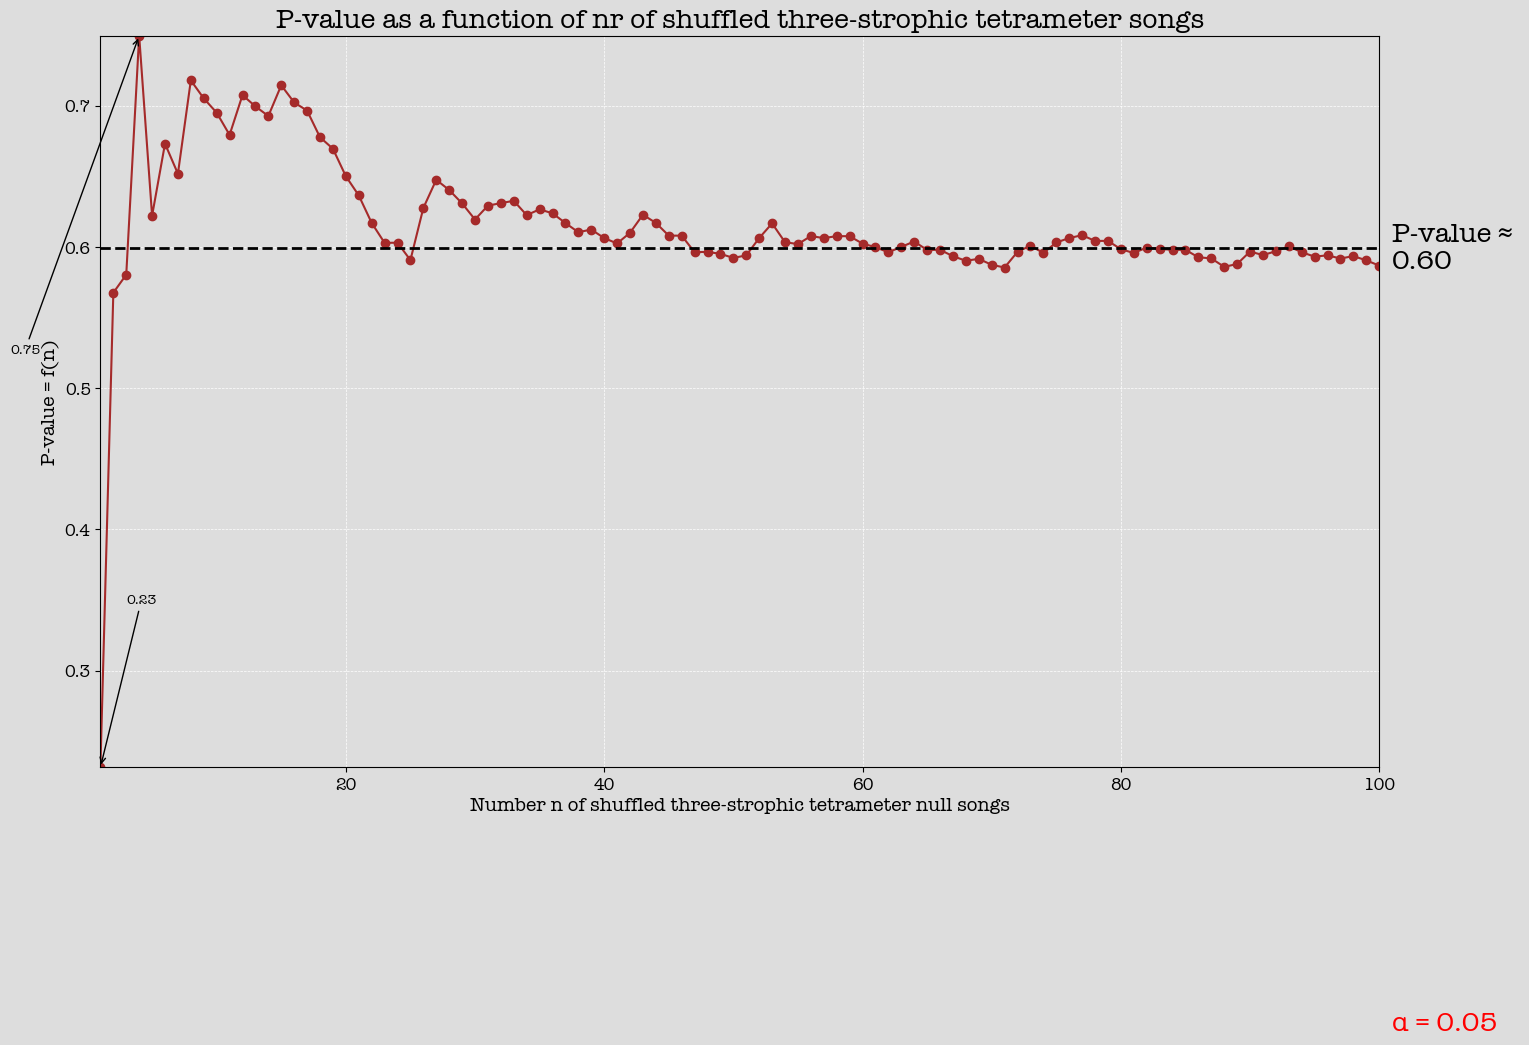

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_tetrameters_three_strophic_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2f}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2f}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
#ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Labels and title
ax.set_xlabel("Number n of shuffled three-strophic tetrameter null songs", color='black')
ax.set_ylabel("P-value = f(n)", color='black')
ax.set_title("P-value as a function of nr of shuffled three-strophic tetrameter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
           label=f'P-value = f(n) ≈ {weighted_asymptote:.2f} as n grows')

ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.2f}',
        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout
plt.savefig("p-value_as_function_of_shuffled_threestrophic_tetrameters.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

4-strophic observed distribution

In [86]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/', 'four-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (observed): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables (Polystrophic):')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean (observed): 0.7864963503649635
Number of variables: 274
Distribution variables (Polystrophic):
	0.5: 60
	0.75: 114
	1.0: 100


4-strophic null trimeter

In [87]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/baseline_trimeter', 'four-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean: {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean: 0.7522935779816514
Number of variables: 109
Distribution variables:
	0.5: 29
	0.75: 50
	1.0: 30


Chi-square test comparing observed 4-strophic distribution to 4-strophic trimeter null:

In [88]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
obs_counts = np.array([60, 114, 100]) # Order: [0.5, 0.75, 1.0]
obs_total = obs_counts.sum()

# Null counts (for expected proportions)
null_counts = np.array([29, 50, 30])
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under H₀ (scaled to obs_total)
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print("Chi-square test comparing observed 4-strophic distribution to 4-strophic trimeter null:")
print(f"Observed total: {obs_total}")
print(f"Expected counts under H₀: {expected_counts.round(2)}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value: < 1e-{0}".format(abs(int(np.floor(np.log10(np.finfo(float).eps))))))

Chi-square test comparing observed 4-strophic distribution to 4-strophic trimeter null:
Observed total: 274
Expected counts under H₀: [ 72.9  125.69  75.41]
Chi-square statistic: 11.3856
Degrees of freedom: 2
P-value: 0.0034 (≈ 10^-3)


Making 100 TRIMETER 4-strophic nulls...

In [3]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions_fourstrophic_trimeter = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 101):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_trimeter_shuffled{i}', 'four-strophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, four-strophic trimeter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions_fourstrophic_trimeter[i] = count_dict

print(shuffled_distributions_fourstrophic_trimeter)

# Make the dict in to a normal dict again
shuffled_distributions_fourstrophic_trimeter = {k: dict(v) for k, v in shuffled_distributions_fourstrophic_trimeter.items()}
print(shuffled_distributions_fourstrophic_trimeter)

1 shuffled versions
Compatibility mean (null, four-strophic trimeter): 0.7522935779816514
Number of variables: 109
Distribution variables:
	0.5: 29
	0.75: 50
	1.0: 30
---------------------------------
2 shuffled versions
Compatibility mean (null, four-strophic trimeter): 0.7523041474654378
Number of variables: 217
Distribution variables:
	0.75: 101
	1.0: 59
	0.5: 57
---------------------------------
3 shuffled versions
Compatibility mean (null, four-strophic trimeter): 0.7484662576687117
Number of variables: 326
Distribution variables:
	1.0: 80
	0.5: 82
	0.75: 164
---------------------------------
4 shuffled versions
Compatibility mean (null, four-strophic trimeter): 0.7471198156682027
Number of variables: 434
Distribution variables:
	1.0: 104
	0.75: 221
	0.5: 109
---------------------------------
5 shuffled versions
Compatibility mean (null, four-strophic trimeter): 0.7444649446494465
Number of variables: 542
Distribution variables:
	0.75: 270
	1.0: 130
	0.5: 142
---------------------

In [10]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_trimeters_4_strophic_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions_fourstrophic_trimeter[i]

    # Observed counts
    obs_counts = np.array([60, 114, 100])  # [0.5, 0.75, 1.0]
    obs_total = obs_counts.sum()

    # Null counts from tetrameter
    null_counts = np.array([distribution[0.5], distribution[0.75], distribution[1]])  # [0.5, 0.75, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_trimeters_4_strophic_p_values[i] = p_value


shuffled_trimeters_4_strophic_p_values = {k: v for k, v in shuffled_trimeters_4_strophic_p_values.items()}
print("shuffled_trimeters_4_strophic_p_values = ")
for key, value in shuffled_trimeters_4_strophic_p_values.items():
    print(f'  {key}: {value:.9f}')

print(shuffled_trimeters_4_strophic_p_values)
print("Max:", max(shuffled_trimeters_4_strophic_p_values.values()))
print("Min:", min(shuffled_trimeters_4_strophic_p_values.values()))



Testing distribution 1:
Chi-square statistic: 11.3856
Degrees of freedom: 2
P-value: 0.0034 (≈ 10^-3)

Testing distribution 2:
Chi-square statistic: 12.1570
Degrees of freedom: 2
P-value: 0.0023 (≈ 10^-3)

Testing distribution 3:
Chi-square statistic: 21.2398
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-5)

Testing distribution 4:
Chi-square statistic: 23.7601
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-6)

Testing distribution 5:
Chi-square statistic: 23.5234
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-6)

Testing distribution 6:
Chi-square statistic: 23.6260
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-6)

Testing distribution 7:
Chi-square statistic: 27.3994
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-6)

Testing distribution 8:
Chi-square statistic: 27.4019
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-6)

Testing distribution 9:
Chi-square statistic: 28.4955
Degrees of freedom: 2
P-value: 0.0000 (≈ 10^-7)

Testing distribution 10:
Chi-square statistic: 29.3840
Degrees of freedo

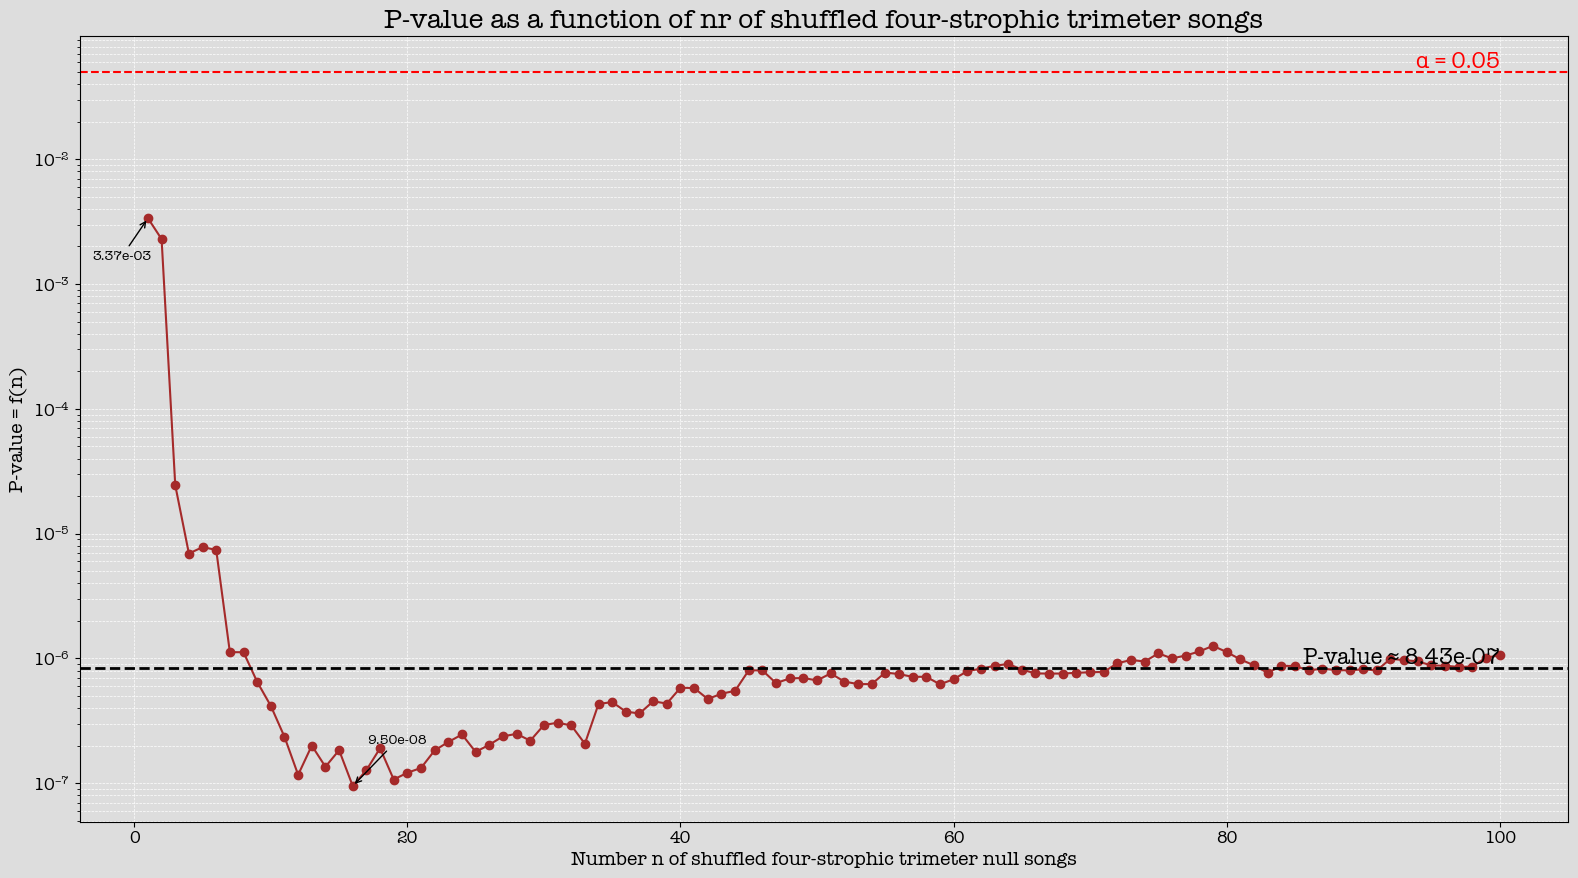

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,
    'axes.titlesize': 20,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

data = shuffled_trimeters_4_strophic_p_values
x = list(data.keys())
y = list(data.values())

min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

fig, ax = plt.subplots(figsize=(16, 9))  # No constrained_layout

bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Use 'offset points' so annotations don’t break layout
ax.annotate(f"{min_val:.2e}", xy=(min_idx, min_val),
            xytext=(10, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            color='black', fontsize=10)

ax.annotate(f"{max_val:.2e}", xy=(max_idx, max_val),
            xytext=(-40, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            color='black', fontsize=10)

alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5)
ax.text(x[-1], alpha_level, 'α = 0.05',
        va='bottom', ha='right', color='red', fontsize=16)

x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]
weights = [w**2 for w in x_norm]
weighted_asymptote = np.average(y, weights=weights)

ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2)
ax.text(x[-1], weighted_asymptote,
        f'P-value ≈ {weighted_asymptote:.2e}',
        va='bottom', ha='right', color='black', fontsize=16)

ax.set_xlabel("Number n of shuffled four-strophic trimeter null songs", color='black')
ax.set_ylabel("P-value = f(n)", color='black')
ax.set_title("P-value as a function of nr of shuffled four-strophic trimeter songs", color='black')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

# ✅ Use log scale to handle wide range
ax.set_yscale('log')

# Add margin to x-axis
ax.set_xlim(min(x) - 5, max(x) + 5)

plt.tight_layout()
plt.savefig("p-value_logscale_trim_songs.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

4-strophic TETRAMETER null

In [89]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Distribution info

all_sets = compatibility_strophicity('data/compiled/baseline_tetrameter', 'four-strophic')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean: {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

Compatibility mean: 0.7651515151515151
Number of variables: 165
Distribution variables:
	0.75: 73
	1.0: 51
	0.5: 41


Chi-square test comparing observed 4-strophic distribution to 4-strophic TETRAMETER null:

In [91]:
import numpy as np
from scipy.stats import chisquare
import math

# Observed counts
obs_counts = np.array([60, 114, 100]) # Order: [0.5, 0.75, 1.0]
obs_total = obs_counts.sum()

# Null counts (for expected proportions)
null_counts = np.array([73, 51, 41])
null_total = null_counts.sum()
null_probs = null_counts / null_total

# Expected counts under H₀ (scaled to obs_total)
expected_counts = null_probs * obs_total

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

# Output
print("Chi-square test comparing observed 4-strophic distribution to 4-strophic trimeter null:")
print(f"Observed total: {obs_total}")
print(f"Expected counts under H₀: {expected_counts.round(2)}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {len(obs_counts) - 1}")
if p_value > 0:
    print(f"P-value: {p_value:.4e} (≈ 10^{math.floor(math.log10(p_value))})")
else:
    print("P-value: < 1e-{0}".format(abs(int(np.floor(np.log10(np.finfo(float).eps))))))

Chi-square test comparing observed 4-strophic distribution to 4-strophic trimeter null:
Observed total: 274
Expected counts under H₀: [121.22  84.69  68.08]
Chi-square statistic: 56.0247
Degrees of freedom: 2
P-value: 6.8295e-13 (≈ 10^-13)


Making 100 4-strophic tetrameter nulls:

In [128]:
from collections import Counter

from src.stats_comp import compatibility_strophicity, compatibility_ratios_to_stats

# Making 100 shuffled null distributions

# import default dict
from collections import defaultdict
shuffled_distributions_4_strophic = defaultdict(dict)

# Make dict with the dist pair for each i
for i in range(1, 101):
    all_sets = compatibility_strophicity(f'data/compiled/baseline_tetrameterall_shuffled{i}', 'four-strophic')
    total_comp = compatibility_ratios_to_stats(all_sets)

    print(f'{i} shuffled versions')
    print(f'Compatibility mean (null, 4-strophic tetrameter): {total_comp}')

    number_of_variables = 0

    values = []
    for element in all_sets:
        for subelement in element:
            for subsubelement in subelement:
                for value in subsubelement:
                    number_of_variables += 1
                    values.append(value)
                    
    print(f'Number of variables: {number_of_variables}')

    count_dict = Counter(values)
    print(f'Distribution variables:')
    for key, value in count_dict.items():
        print(f'\t{key}: {value}')
    print('---------------------------------')
    shuffled_distributions_4_strophic[i] = count_dict

print(shuffled_distributions_4_strophic)

# Make the dict in to a normal dict again
shuffled_distributions_4_strophic = {k: dict(v) for k, v in shuffled_distributions_4_strophic.items()}
print(shuffled_distributions_4_strophic)

1 shuffled versions
Compatibility mean (null, 4-strophic tetrameter): 0.7651515151515151
Number of variables: 165
Distribution variables:
	0.75: 73
	1.0: 51
	0.5: 41
---------------------------------
2 shuffled versions
Compatibility mean (null, 4-strophic tetrameter): 0.7651515151515151
Number of variables: 330
Distribution variables:
	0.75: 152
	1.0: 99
	0.5: 79
---------------------------------
3 shuffled versions
Compatibility mean (null, 4-strophic tetrameter): 0.7712121212121212
Number of variables: 495
Distribution variables:
	0.75: 227
	1.0: 155
	0.5: 113
---------------------------------
4 shuffled versions
Compatibility mean (null, 4-strophic tetrameter): 0.771969696969697
Number of variables: 660
Distribution variables:
	1.0: 207
	0.75: 304
	0.5: 149
---------------------------------
5 shuffled versions
Compatibility mean (null, 4-strophic tetrameter): 0.7754545454545455
Number of variables: 825
Distribution variables:
	1.0: 269
	0.75: 371
	0.5: 185
-------------------------

In [130]:
from collections import defaultdict
import numpy as np
from scipy.stats import chisquare
import math

shuffled_tetrameters_4_strophic_p_values = defaultdict(dict)
for i in range(1, 101):
    print(f'\nTesting distribution {i}:')
    distribution = shuffled_distributions_4_strophic[i]

    # Observed counts
    obs_counts = np.array([60, 114, 100])  # [0.5, 0.75, 1.0]
    obs_total = obs_counts.sum()

    # Null counts from tetrameter
    null_counts = np.array([distribution[0.5], distribution[0.75], distribution[1]])  # [0.5, 0.75, 1.0]
    null_total = null_counts.sum()
    null_probs = null_counts / null_total

    # Expected counts under null
    expected_counts = null_probs * obs_total

    # Chi-square test
    chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=expected_counts)

    # Output
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {len(obs_counts) - 1}")
    if p_value > 0:
        print(f"P-value: {p_value:.4f} (≈ 10^{math.floor(math.log10(p_value))})")
    else:
        print("P-value is effectively zero (underflow)")

    shuffled_tetrameters_4_strophic_p_values[i] = p_value


shuffled_tetrameters_4_strophic_p_values = {k: v for k, v in shuffled_tetrameters_4_strophic_p_values.items()}
print("shuffled_tetrameters_three_strophic_p_values = ")
for key, value in shuffled_tetrameters_4_strophic_p_values.items():
    print(f'  {key}: {value:.9f}')

print(shuffled_tetrameters_4_strophic_p_values)


Testing distribution 1:
Chi-square statistic: 4.1579
Degrees of freedom: 2
P-value: 0.1251 (≈ 10^-1)

Testing distribution 2:
Chi-square statistic: 5.5121
Degrees of freedom: 2
P-value: 0.0635 (≈ 10^-2)

Testing distribution 3:
Chi-square statistic: 3.5354
Degrees of freedom: 2
P-value: 0.1707 (≈ 10^-1)

Testing distribution 4:
Chi-square statistic: 3.5378
Degrees of freedom: 2
P-value: 0.1705 (≈ 10^-1)

Testing distribution 5:
Chi-square statistic: 1.9951
Degrees of freedom: 2
P-value: 0.3688 (≈ 10^-1)

Testing distribution 6:
Chi-square statistic: 1.7823
Degrees of freedom: 2
P-value: 0.4102 (≈ 10^-1)

Testing distribution 7:
Chi-square statistic: 1.3222
Degrees of freedom: 2
P-value: 0.5163 (≈ 10^-1)

Testing distribution 8:
Chi-square statistic: 1.1739
Degrees of freedom: 2
P-value: 0.5560 (≈ 10^-1)

Testing distribution 9:
Chi-square statistic: 1.0799
Degrees of freedom: 2
P-value: 0.5828 (≈ 10^-1)

Testing distribution 10:
Chi-square statistic: 0.9191
Degrees of freedom: 2
P-val

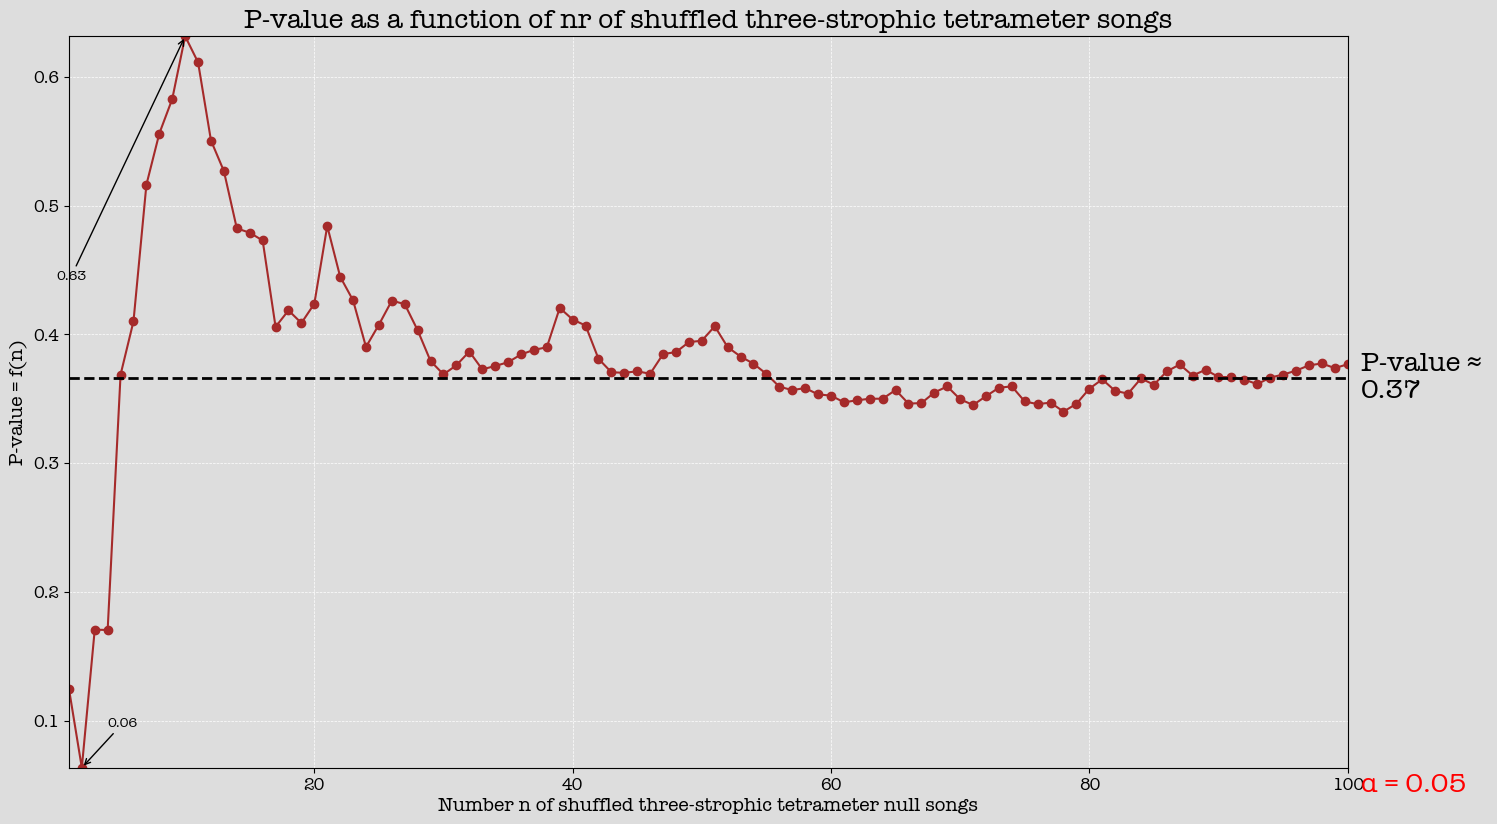

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Global font size settings
plt.rcParams.update({
    'font.family': 'American Typewriter',
    'font.size': 14,            # Global font size
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 14,       # Axis label size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12       # Legend text
})

data = shuffled_tetrameters_4_strophic_p_values
x = list(data.keys())
y = list(data.values())

# Find min and max values and their corresponding keys
min_idx = x[np.argmin(y)]
max_idx = x[np.argmax(y)]
min_val = y[np.argmin(y)]
max_val = y[np.argmax(y)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(16.5, 9.5))

# Set uniform light grey background
bg_color = '#dddddd'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot data
ax.plot(x, y, marker='o', linestyle='-', color='brown')

# Annotate min and max values
ax.annotate(f"{min_val:.2f}", xy=(min_idx, min_val), xytext=(min_idx + 2, min_val * 1.5),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)
ax.annotate(f"{max_val:.2f}", xy=(max_idx, max_val), xytext=(max_idx - 10, max_val * 0.7),
            arrowprops=dict(arrowstyle='->', color='black'), color='black', fontsize=10)

# Add red line for α = 0.05
alpha_level = 0.05
ax.axhline(y=alpha_level, color='red', linestyle='--', linewidth=1.5, label='α = 0.05')
ax.text(x[-1] + 1, alpha_level, 'α = 0.05', va='center', ha='left', color='red', fontsize=20)

# Set log scale and limits
#ax.set_yscale('log')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Labels and title
ax.set_xlabel("Number n of shuffled three-strophic tetrameter null songs", color='black')
ax.set_ylabel("P-value = f(n)", color='black')
ax.set_title("P-value as a function of nr of shuffled three-strophic tetrameter songs", color='black')

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.tick_params(colors='black')

import numpy as np

# Normalize x to [0,1]
x_norm = [(xi - min(x)) / (max(x) - min(x)) for xi in x]

# Weights increasing toward 100, here quadratic for stronger emphasis near max
weights = [w**2 for w in x_norm]

# Weighted mean as asymptote
weighted_asymptote = np.average(y, weights=weights)

# Plot weighted asymptote line with dashed style and updated label
ax.axhline(y=weighted_asymptote, color='black', linestyle='--', linewidth=2,
           label=f'P-value = f(n) ≈ {weighted_asymptote:.2f} as n grows')

ax.text(x[-1] + 1, weighted_asymptote, f'P-value ≈ \n{weighted_asymptote:.2f}',
        va='center', ha='left', color='black', fontsize=20)

#ax.legend()

plt.tight_layout
plt.savefig("p-value_as_function_of_shuffled_threestrophic_tetrameters.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()

## Monte Carlo Test for the Comp Mean 

We’re computing a mean $\bar{x}$ over $n$ random variables (representing syllables or accents), which
- are bounded in [0, 1],
- take values in a discrete set, 
  - for full corpus
$\left\{\frac{1}{2}, \frac{2}{3}, \frac{3}{4}, 1 \right\}$ (97.0% being binary 0.5 or 1)
  - or just binary for any metric on the antistrophic sub-corpus,

and of which the true underlying distribution is:
- known only empirically (no analytical variance available!),
- not symmetric, not uniform, and heavily bimodal (binary),

and then comparing with a known baseline mean under the null, $\mu_0$.

To do this well we need information about the distribution $\bar{x}$ comes from. It turns out the two lowest values $\frac{1}{4}$ and $\frac{1}{3}$ actually never occur, so there are only $\left\{\frac{1}{4}, \frac{1}{3}, \frac{1}{2}, \frac{2}{3}\right\}$. (This means that among 3 or 4 responding strophes there are no syllables where each all are incompatible; this makes sense, since there are only two directions for the contour to go, since the flat is compatible with either by definition!)

In [ ]:
from collections import Counter

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

# Distribution info (Full-corpus)

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Compatibility mean (observed): {total_comp}')

number_of_variables = 0

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)

print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(f'Distribution variables:')
for key, value in count_dict.items():
    print(f'\t{key}: {value}')

##### Trimeter Null Distribution

In [20]:
from collections import Counter

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

# Trimeter Null distribution info

null_sets = compatibility_corpus('data/compiled/baseline')
null_comp = compatibility_ratios_to_stats(null_sets)

print('--------------------------------')
print(f'Compatibility mean under trimeter null (m0): {null_comp}')

number_of_variables_null = 0

values_null = []
for element in null_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables_null += 1
                values_null.append(value)

print(f'Number of variables (null): {number_of_variables_null}')

count_dict_null = Counter(values_null)
print(f'Null distribution variables:')
for key, value in count_dict_null.items():
    print(f'\t{key}: {value}')

--------------------------------
Compatibility mean under trimeter null (m0): 0.7966510294500913
Number of variables (null): 1279
Null distribution variables:
	0.6666666666666666: 196
	1.0: 632
	0.5: 328
	0.75: 123


##### Tetrameter Null Distribution

In [11]:
from collections import Counter

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

# Tetrameter Null distribution info

null_sets = compatibility_corpus('data/compiled/baseline_tetrameter')
null_comp = compatibility_ratios_to_stats(null_sets)

print('--------------------------------')
print(f'Compatibility mean under tetrameter null (m0): {null_comp}')

number_of_variables_null = 0

values_null = []
for element in null_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables_null += 1
                values_null.append(value)

print(f'Number of variables (null): {number_of_variables_null}')

count_dict_null = Counter(values_null)
print(f'Null distribution variables:')
for key, value in count_dict_null.items():
    print(f'\t{key}: {value}')

--------------------------------
Compatibility mean under tetrameter null (m0): 0.8028344671201814
Number of variables (null): 735
Null distribution variables:
	0.6666666666666666: 134
	1.0: 364
	0.5: 164
	0.75: 73


### Acute-circumflex and barys ratio 

Binomial significance test for the binary acute-circumflex and barys-only ratio metrics. 